<a href="https://colab.research.google.com/github/hafizhfadhullah/Python/blob/main/MYC/CDD_ML_Part_2_Acetylcholinesterase_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**


---

## **Install conda and rdkit**

In [3]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-29 08:13:24--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   197MB/s    in 0.4s    

2025-01-29 08:13:24 (197 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

## **Load bioactivity data**

In [2]:
! wget https://raw.githubusercontent.com/hafizhfadhullah/Data/main/MYC_03_bioactivity_data_curated.csv

--2025-01-29 08:13:16--  https://raw.githubusercontent.com/hafizhfadhullah/Data/main/MYC_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74932 (73K) [text/plain]
Saving to: ‘MYC_03_bioactivity_data_curated.csv’

MYC_03_bioactivity_ 100%[===================>]  73.18K  --.-KB/s    in 0.02s   

2025-01-29 08:13:17 (3.36 MB/s) - ‘MYC_03_bioactivity_data_curated.csv’ saved [74932/74932]



In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('MYC_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1336889,O=C(O)c1ccc(Nc2ccc([N+](=O)[O-])c3nonc23)cc1,33000.0,inactive
1,CHEMBL2312756,O=[N+]([O-])c1ccc(Nc2ccccc2-c2ccccc2)c2nonc12,146000.0,inactive
2,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,60000.0,inactive
3,CHEMBL1172104,COc1cc(/C=C\c2ccc(OC)c(OC)c2)cc(OC)c1,60000.0,inactive
4,CHEMBL3222133,CC(C)c1ccc(/C=C2\SC(=S)N(CN3CCCCC3)C2=O)cc1,29000.0,inactive
...,...,...,...,...
894,CHEMBL5069754,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1Cl)c1ncc...,42.0,active
895,CHEMBL5080039,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cn1)c1ncc(C...,6.9,active
896,CHEMBL5084198,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,1.3,active
897,CHEMBL5090513,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,2.4,active


In [7]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [8]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [9]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1336889,33000.0,inactive,O=C(O)c1ccc(Nc2ccc([N+](=O)[O-])c3nonc23)cc1
1,CHEMBL2312756,146000.0,inactive,O=[N+]([O-])c1ccc(Nc2ccccc2-c2ccccc2)c2nonc12
2,CHEMBL165,60000.0,inactive,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1
3,CHEMBL1172104,60000.0,inactive,COc1cc(/C=C\c2ccc(OC)c(OC)c2)cc(OC)c1
4,CHEMBL3222133,29000.0,inactive,CC(C)c1ccc(/C=C2\SC(=S)N(CN3CCCCC3)C2=O)cc1
...,...,...,...,...
894,CHEMBL5069754,42.0,active,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1Cl)c1ncc...
895,CHEMBL5080039,6.9,active,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cn1)c1ncc(C...
896,CHEMBL5084198,1.3,active,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...
897,CHEMBL5090513,2.4,active,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [10]:
pip install --upgrade rdkit

     |████████████████████████████████| 29.5 MB 54.2 MB/s 


In [11]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [31]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [32]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,300.230000,2.57280,2.0,7.0
1,332.319000,4.54160,1.0,6.0
2,228.247000,2.97380,3.0,3.0
3,300.354000,3.89140,0.0,4.0
4,360.548000,4.45460,0.0,4.0
...,...,...,...,...
894,533.090305,6.19022,1.0,7.0
895,499.633305,4.93182,1.0,8.0
896,535.613305,5.21002,1.0,8.0
897,521.611305,4.97234,1.0,9.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [33]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,300.230000,2.57280,2.0,7.0
1,332.319000,4.54160,1.0,6.0
2,228.247000,2.97380,3.0,3.0
3,300.354000,3.89140,0.0,4.0
4,360.548000,4.45460,0.0,4.0
...,...,...,...,...
894,533.090305,6.19022,1.0,7.0
895,499.633305,4.93182,1.0,8.0
896,535.613305,5.21002,1.0,8.0
897,521.611305,4.97234,1.0,9.0


In [34]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1336889,O=C(O)c1ccc(Nc2ccc([N+](=O)[O-])c3nonc23)cc1,33000.0,inactive
1,CHEMBL2312756,O=[N+]([O-])c1ccc(Nc2ccccc2-c2ccccc2)c2nonc12,146000.0,inactive
2,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,60000.0,inactive
3,CHEMBL1172104,COc1cc(/C=C\c2ccc(OC)c(OC)c2)cc(OC)c1,60000.0,inactive
4,CHEMBL3222133,CC(C)c1ccc(/C=C2\SC(=S)N(CN3CCCCC3)C2=O)cc1,29000.0,inactive
...,...,...,...,...
894,CHEMBL5069754,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1Cl)c1ncc...,42.0,active
895,CHEMBL5080039,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cn1)c1ncc(C...,6.9,active
896,CHEMBL5084198,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,1.3,active
897,CHEMBL5090513,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,2.4,active


Now, let's combine the 2 DataFrame

In [35]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [36]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1336889,O=C(O)c1ccc(Nc2ccc([N+](=O)[O-])c3nonc23)cc1,33000.0,inactive,300.230000,2.57280,2.0,7.0
1,CHEMBL2312756,O=[N+]([O-])c1ccc(Nc2ccccc2-c2ccccc2)c2nonc12,146000.0,inactive,332.319000,4.54160,1.0,6.0
2,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,60000.0,inactive,228.247000,2.97380,3.0,3.0
3,CHEMBL1172104,COc1cc(/C=C\c2ccc(OC)c(OC)c2)cc(OC)c1,60000.0,inactive,300.354000,3.89140,0.0,4.0
4,CHEMBL3222133,CC(C)c1ccc(/C=C2\SC(=S)N(CN3CCCCC3)C2=O)cc1,29000.0,inactive,360.548000,4.45460,0.0,4.0
...,...,...,...,...,...,...,...,...
894,CHEMBL5069754,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1Cl)c1ncc...,42.0,active,533.090305,6.19022,1.0,7.0
895,CHEMBL5080039,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cn1)c1ncc(C...,6.9,active,499.633305,4.93182,1.0,8.0
896,CHEMBL5084198,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,1.3,active,535.613305,5.21002,1.0,8.0
897,CHEMBL5090513,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,2.4,active,521.611305,4.97234,1.0,9.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [37]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [38]:
df_combined.standard_value.describe()

,standard_value
count,8.990000e+02
mean,3.247389e+04
std,2.636108e+05
min,2.000000e-01
25%,3.000000e+02
50%,1.000000e+03
75%,1.000000e+04
max,6.800000e+06


In [39]:
-np.log10( (10**-9)* 100000000 )

1.0

In [40]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [41]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)  # Perbaikan di sini

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [42]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1336889,O=C(O)c1ccc(Nc2ccc([N+](=O)[O-])c3nonc23)cc1,inactive,300.230000,2.57280,2.0,7.0,33000.0
1,CHEMBL2312756,O=[N+]([O-])c1ccc(Nc2ccccc2-c2ccccc2)c2nonc12,inactive,332.319000,4.54160,1.0,6.0,146000.0
2,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,228.247000,2.97380,3.0,3.0,60000.0
3,CHEMBL1172104,COc1cc(/C=C\c2ccc(OC)c(OC)c2)cc(OC)c1,inactive,300.354000,3.89140,0.0,4.0,60000.0
4,CHEMBL3222133,CC(C)c1ccc(/C=C2\SC(=S)N(CN3CCCCC3)C2=O)cc1,inactive,360.548000,4.45460,0.0,4.0,29000.0
...,...,...,...,...,...,...,...,...
894,CHEMBL5069754,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1Cl)c1ncc...,active,533.090305,6.19022,1.0,7.0,42.0
895,CHEMBL5080039,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cn1)c1ncc(C...,active,499.633305,4.93182,1.0,8.0,6.9
896,CHEMBL5084198,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,active,535.613305,5.21002,1.0,8.0,1.3
897,CHEMBL5090513,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,active,521.611305,4.97234,1.0,9.0,2.4


In [43]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,8.990000e+02
mean,3.247389e+04
std,2.636108e+05
min,2.000000e-01
25%,3.000000e+02
50%,1.000000e+03
75%,1.000000e+04
max,6.800000e+06


In [44]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1336889,O=C(O)c1ccc(Nc2ccc([N+](=O)[O-])c3nonc23)cc1,inactive,300.230000,2.57280,2.0,7.0,4.481486
1,CHEMBL2312756,O=[N+]([O-])c1ccc(Nc2ccccc2-c2ccccc2)c2nonc12,inactive,332.319000,4.54160,1.0,6.0,3.835647
2,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,228.247000,2.97380,3.0,3.0,4.221849
3,CHEMBL1172104,COc1cc(/C=C\c2ccc(OC)c(OC)c2)cc(OC)c1,inactive,300.354000,3.89140,0.0,4.0,4.221849
4,CHEMBL3222133,CC(C)c1ccc(/C=C2\SC(=S)N(CN3CCCCC3)C2=O)cc1,inactive,360.548000,4.45460,0.0,4.0,4.537602
...,...,...,...,...,...,...,...,...
894,CHEMBL5069754,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1Cl)c1ncc...,active,533.090305,6.19022,1.0,7.0,7.376751
895,CHEMBL5080039,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cn1)c1ncc(C...,active,499.633305,4.93182,1.0,8.0,8.161151
896,CHEMBL5084198,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,active,535.613305,5.21002,1.0,8.0,8.886057
897,CHEMBL5090513,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,active,521.611305,4.97234,1.0,9.0,8.619789


In [45]:
df_final.pIC50.describe()

,pIC50
count,899.000000
mean,5.757078
std,0.949099
min,2.167491
25%,5.000000
50%,6.000000
75%,6.522879
max,9.698970


Let's write this to CSV file.

In [46]:
df_final.to_csv('MYP_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [47]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1336889,O=C(O)c1ccc(Nc2ccc([N+](=O)[O-])c3nonc23)cc1,inactive,300.230000,2.57280,2.0,7.0,4.481486
1,CHEMBL2312756,O=[N+]([O-])c1ccc(Nc2ccccc2-c2ccccc2)c2nonc12,inactive,332.319000,4.54160,1.0,6.0,3.835647
2,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,228.247000,2.97380,3.0,3.0,4.221849
3,CHEMBL1172104,COc1cc(/C=C\c2ccc(OC)c(OC)c2)cc(OC)c1,inactive,300.354000,3.89140,0.0,4.0,4.221849
4,CHEMBL3222133,CC(C)c1ccc(/C=C2\SC(=S)N(CN3CCCCC3)C2=O)cc1,inactive,360.548000,4.45460,0.0,4.0,4.537602
...,...,...,...,...,...,...,...,...
894,CHEMBL5069754,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1Cl)c1ncc...,active,533.090305,6.19022,1.0,7.0,7.376751
895,CHEMBL5080039,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cn1)c1ncc(C...,active,499.633305,4.93182,1.0,8.0,8.161151
896,CHEMBL5084198,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,active,535.613305,5.21002,1.0,8.0,8.886057
897,CHEMBL5090513,[2H]C([2H])([2H])c1nnn(C)c1-c1cc2c(cc1F)c1ncc(...,active,521.611305,4.97234,1.0,9.0,8.619789


Let's write this to CSV file.

In [48]:
df_2class.to_csv('MYP_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [49]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

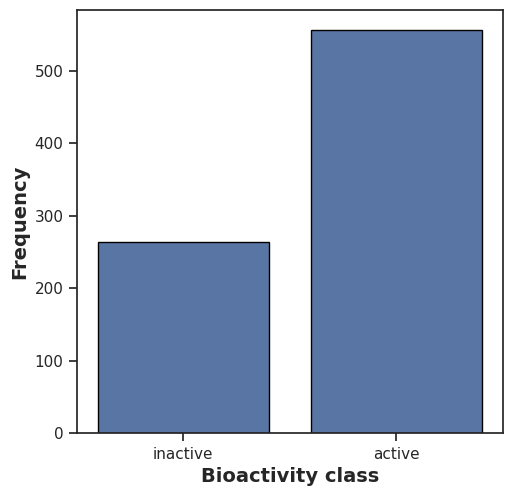

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

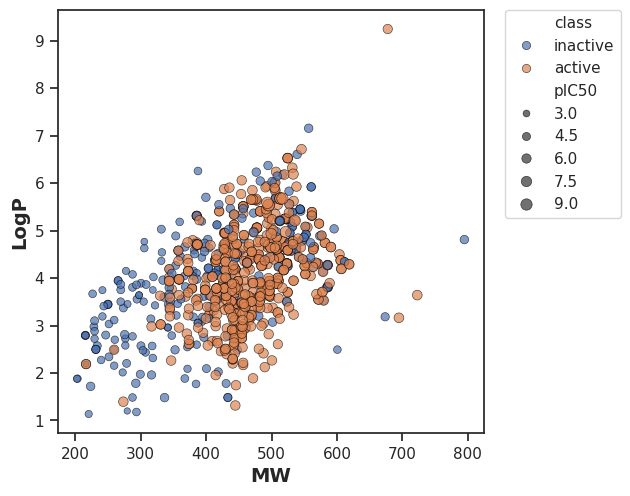

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

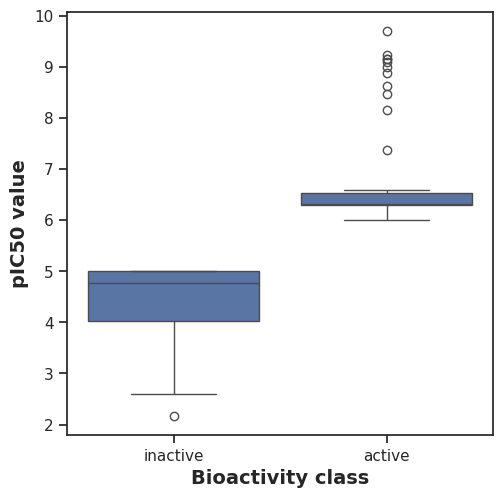

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [65]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [66]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,146784.0,6.992760e-124,0.05,Different distribution (reject H0)


#### **MW**

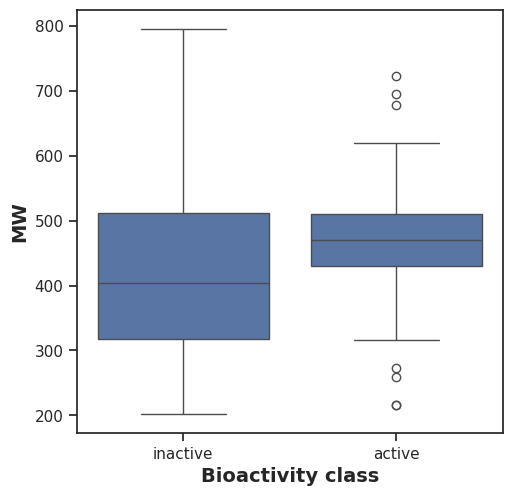

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [68]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,96871.5,1.271902e-13,0.05,Different distribution (reject H0)


#### **LogP**

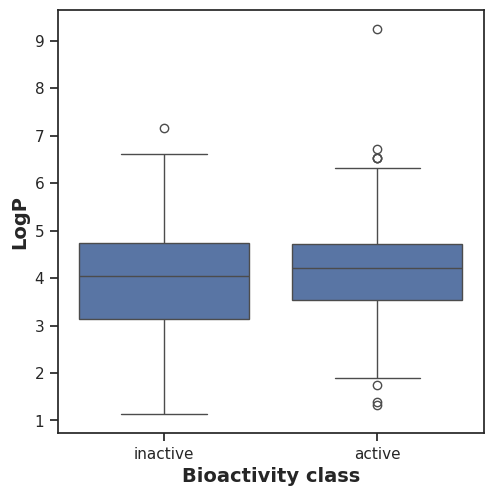

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [70]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,81129.0,0.014633,0.05,Different distribution (reject H0)


#### **NumHDonors**

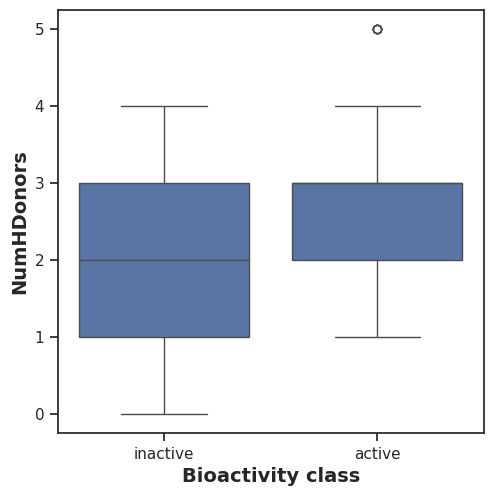

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [72]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,104661.5,2.464515e-25,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

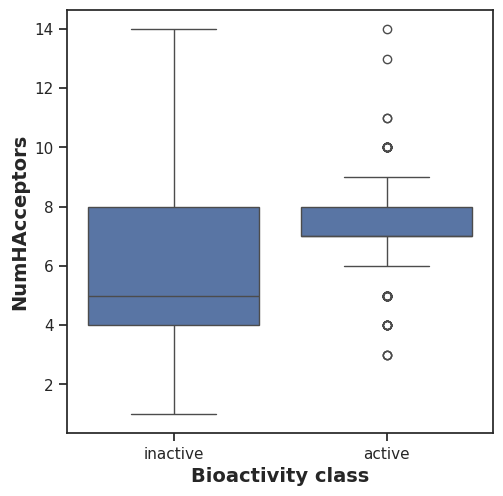

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [74]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,108931.0,5.191751e-30,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [75]:
! zip -r results.zip . -i *.csv *.pdf

  adding: MYP_05_bioactivity_data_2class_pIC50.csv (deflated 81%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: MYC_03_bioactivity_data_curated.csv (deflated 85%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: MYP_04_bioactivity_data_3class_pIC50.csv (deflated 81%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 81%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 81%)
